<a href="https://colab.research.google.com/github/brinda-lax/Feature-engineering-and-Divorce-Prediction/blob/main/Feature_Engineering%26_Model_Prediction_marriage_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ak0212_marriage_trends_in_india_love_vs_arranged_path = kagglehub.dataset_download('ak0212/marriage-trends-in-india-love-vs-arranged')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing Mandatory Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier

## Reading The DataFrame

In [3]:
df=pd.read_csv('/content/sample_data/marriage_data_india.csv')

In [4]:
df.columns

Index(['ID', 'Marriage_Type', 'Age_at_Marriage', 'Gender', 'Education_Level',
       'Caste_Match', 'Religion', 'Parental_Approval', 'Urban_Rural',
       'Dowry_Exchanged', 'Marital_Satisfaction', 'Divorce_Status',
       'Children_Count', 'Income_Level', 'Years_Since_Marriage',
       'Spouse_Working', 'Inter-Caste', 'Inter-Religion'],
      dtype='object')

## Checking null values

In [5]:
df.isnull().sum()

,0
ID,0
Marriage_Type,0
Age_at_Marriage,0
Gender,0
Education_Level,0
Caste_Match,0
Religion,0
Parental_Approval,0
Urban_Rural,0
Dowry_Exchanged,0


## Code to check the columns whether they belong to Ordinal or One hot encoding

In [6]:
df['Inter-Religion'].value_counts()

,count
Inter-Religion,
No,7972
Yes,2028


In [7]:
df['Divorce_Status'].value_counts()

,count
Divorce_Status,
No,8999
Yes,1001


## Segregating Columns For Encoding

In [11]:
columns_to_ohe = [1, 3, 5, 6, 7, 8, 9,13, 15,16,17]

columns_to_ode=[4,10]

In [12]:
numerical_columns=['Age_at_Marriage','Years_Since_Marriage']

In [13]:
df['Children_Count'].value_counts().sort_index()

,count
Children_Count,
0,1590
1,1731
2,1654
3,1698
4,1680
5,1647


## Testing Outliers Presence using Box plot

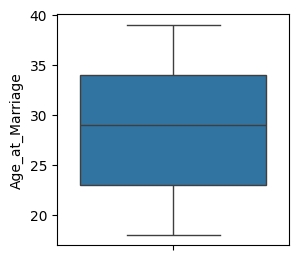

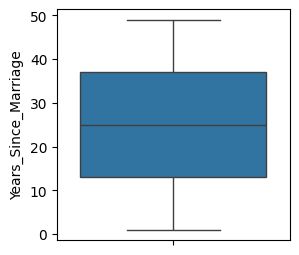

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in numerical_columns:
    plt.figure(figsize=(3,3))
    sns.boxplot(df[i])
    plt.show()

## To Check Normalization in numerical data

Normalization checking is important because it helps ensure that your data is in the right "shape" for your chosen algorithms. Here are some key reasons:

Algorithm Assumptions:
Many statistical models and machine learning algorithms (e.g., linear regression, logistic regression, k-nearest neighbors, and neural networks) assume that the data is normally distributed or that all features are on a similar scale. If these assumptions aren’t met, the model’s performance can suffer.

Improved Convergence and Performance:
Normalizing data (scaling features to a common range or transforming distributions to be more normal) can help gradient-based algorithms converge faster and more reliably, leading to better and more stable predictions.

Reduced Influence of Outliers:
Checking for normalization can reveal skewed distributions or extreme outliers. In such cases, you might use transformations (like log or Box-Cox) to bring data closer to normality, which helps reduce the undue influence of outliers.

Fair Comparison Between Features:
When features are on different scales, some may dominate the model simply because of their magnitude. Normalization ensures that each feature contributes more equally, improving the interpretability and fairness of the model.

Model Interpretability and Diagnostics:
By examining how closely your data follows a normal distribution, you gain insights into potential data issues, allowing you to decide whether to apply normalization or other transformations before modeling.

In summary, checking for normalization helps improve model performance, stability, and interpretability by ensuring that your features are balanced and meet the assumptions underlying many machine learning methods.

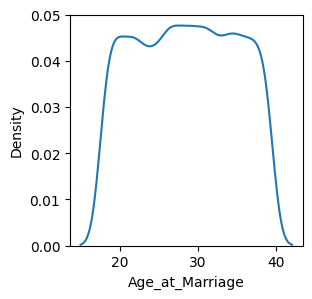

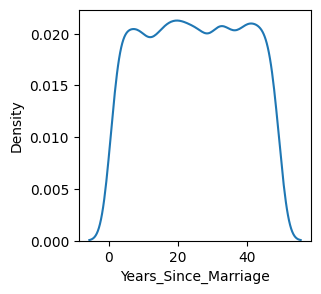

In [15]:
for i in numerical_columns:
    plt.figure(figsize=(3,3))
    sns.kdeplot(df[i])

## Categorising For Ordinal Encoding

In [16]:
categories=[['School','Graduate','Postgraduate','PhD'],['Low','Medium','High']]


In [17]:
ohe=OneHotEncoder(drop='first',sparse_output=False)
ode=OrdinalEncoder(categories=categories)
y_original=df.iloc[:,11]
y_original.head()

,Divorce_Status
0,Yes
1,No
2,No
3,No
4,No


## Transforming Columns Using Column Transformer

In [18]:
transformer = ColumnTransformer([
    ('ohe', ohe, columns_to_ohe),
    ('ode', ode, columns_to_ode)
], remainder='passthrough')

In [19]:
X_n=transformer.fit_transform(df)
column_names=transformer.get_feature_names_out()
df_transformed = pd.DataFrame(X_n, columns=column_names)

In [20]:
df_transformed.head()

,ohe__Marriage_Type_Love,ohe__Gender_Male,ohe__Caste_Match_Same,ohe__Religion_Hindu,ohe__Religion_Muslim,ohe__Religion_Others,ohe__Religion_Sikh,ohe__Parental_Approval_Partial,ohe__Parental_Approval_Yes,ohe__Urban_Rural_Urban,...,ohe__Spouse_Working_Yes,ohe__Inter-Caste_Yes,ohe__Inter-Religion_Yes,ode__Education_Level,ode__Marital_Satisfaction,remainder__ID,remainder__Age_at_Marriage,remainder__Divorce_Status,remainder__Children_Count,remainder__Years_Since_Marriage
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1,23,Yes,5,34
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2,28,No,3,42
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,1.0,3,39,No,0,25
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,4,26,No,0,12
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,5,32,No,1,41


In [21]:
df_transformed.drop(columns=['remainder__Divorce_Status','remainder__ID'],inplace=True)

## Encoding the Output

In [22]:
le=LabelEncoder()
y=le.fit_transform(y_original)
X=df_transformed

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=43)

In [24]:
X_train.columns

Index(['ohe__Marriage_Type_Love', 'ohe__Gender_Male', 'ohe__Caste_Match_Same',
       'ohe__Religion_Hindu', 'ohe__Religion_Muslim', 'ohe__Religion_Others',
       'ohe__Religion_Sikh', 'ohe__Parental_Approval_Partial',
       'ohe__Parental_Approval_Yes', 'ohe__Urban_Rural_Urban',
       'ohe__Dowry_Exchanged_Not Disclosed', 'ohe__Dowry_Exchanged_Yes',
       'ohe__Income_Level_Low', 'ohe__Income_Level_Middle',
       'ohe__Spouse_Working_Yes', 'ohe__Inter-Caste_Yes',
       'ohe__Inter-Religion_Yes', 'ode__Education_Level',
       'ode__Marital_Satisfaction', 'remainder__Age_at_Marriage',
       'remainder__Children_Count', 'remainder__Years_Since_Marriage'],
      dtype='object')

## Lets check whether Random classifier fits our Data

I chose a Random Forest classifier for the marriage dataset for several reasons:

Robustness to Mixed Data:
Random Forests can easily handle both categorical (after encoding) and numerical features without needing heavy preprocessing like scaling.

Handling Non-Linear Relationships:
Marriage-related data may include complex, non-linear interactions between factors (like education, parental approval, and income), which Random Forests can capture effectively.

Built-In Feature Importance:
They offer insights into which factors contribute most to predicting the outcome, helping us understand the key drivers in marriage decisions.

Resilience to Overfitting:
Although overfitting can occur, the ensemble approach (using multiple trees) tends to reduce this risk compared to a single decision tree, and we can further tune hyperparameters if needed.

Ease of Use:
Random Forests require minimal parameter tuning out-of-the-box, making them a good starting point for exploratory predictive modeling.

In [25]:
model=RandomForestClassifier(n_estimators=100,random_state=40)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=40)

In [26]:
y_truth=model.predict(X_test)

In [27]:
test_accuracy=model.score(X_test,y_test)

## Since Test accuracy is 0.89 so model does a Good Job!!

In [28]:
test_accuracy

0.897

In [29]:
feature_importances = model.feature_importances_

In [30]:
feature_names = X_train.columns

In [31]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

In [32]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)


## Checking Best features

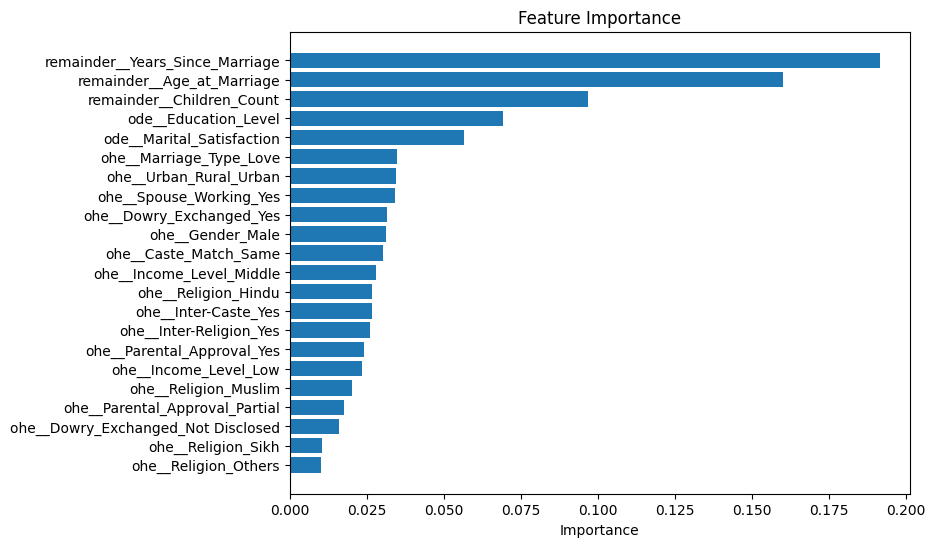

In [33]:
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

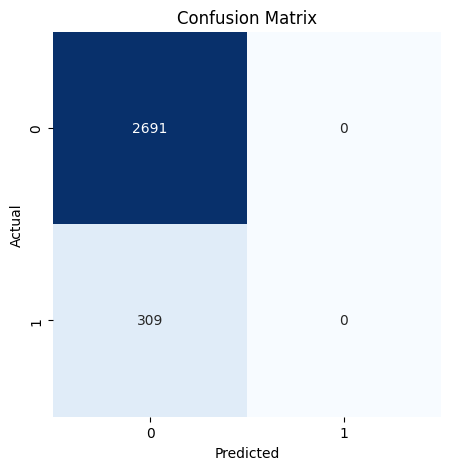

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_truth)

# Visualize as heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
new_sample = np.array([
    [1, 1, 1, 0, 0, 0, 1,   # One-hot encoded categorical features
     1, 0, 1, 0, 1, 0, 1,
     1, 0, 1,               # Binary encoded features
     3, 2,                  # Ordinal encoded features (Education, Satisfaction)
     40, 4, 30]             # Numerical features (Age, Children, Years of Marriage)
])

## Lets Predict a sample data

In [36]:
y_new=model.predict(new_sample)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Alas it Works!!!!

In [37]:
if y_new[0]==1:
    years = new_sample[0][-1]
    gender=new_sample[0][1]

    a = 'He' if gender == 1 else 'She'
    print(f'Yes,the {a} Gets divorced after {years} of Marriage')
else:
    a = 'He' if new_sample[0][1] == 1 else 'She'
    print(f'No, {a} lives happily ever after.')


No, He lives happily ever after.


## Conclusion



Based on My  analysis and predictive modeling, here are some actionable insights for reducing divorce risk:

Target Key Risk Factors:
The model identifies factors such as education level, parental approval, and financial stability as significant predictors. Interventions could focus on improving family communication and setting realistic expectations before marriage.

Strengthen Pre-Marital Counseling:
Encourage comprehensive pre-marital counseling that addresses conflict resolution, financial planning, and family dynamics to mitigate identified risks.

Customized Relationship Support:
Use the model’s insights to develop targeted support programs. For example, couples with lower parental approval or mismatched educational backgrounds may benefit from additional relationship coaching and mediation services.

Early Warning Systems:
Organizations (e.g., marriage counselors or community programs) can use these predictive insights to flag high-risk relationships early on and offer proactive interventions.

Data-Driven Policy Making:
Policy-makers and social service providers can utilize these insights to allocate resources more effectively, focusing on educational and economic support programs that may indirectly lower divorce rates.

Implementing these strategies could help improve marital stability and reduce the likelihood of divorce, ultimately leading to healthier relationships and stronger communities.